# Example 1

In [1]:
import jyrobot
import random

In [2]:
jyrobot.load_world()

Searching for jyrobot config files...
Directory: ./worlds/
    no files found
Directory: /home/dblank/jyrobot/jyrobot/worlds/
    'duck-scribbler-no-walls'
    'soccer'
    'two-scribblers-no-walls'
    'two-scribblers-one-wall'
    'two-scribblers'
    'test1/duck-scribbler-no-walls'
    'test1/soccer'
    'test1/two-scribblers-no-walls'
    'test1/two-scribblers-one-wall'
    'test1/two-scribblers'
    'test2/duck-scribbler-no-walls'
    'test2/soccer'
    'test2/two-scribblers-no-walls'
    'test2/two-scribblers-one-wall'
    'test2/two-scribblers'
    'test2/test4/duck-scribbler-no-walls'
    'test2/test4/soccer'
    'test2/test4/two-scribblers-no-walls'
    'test2/test4/two-scribblers-one-wall'
    'test2/test4/two-scribblers'


In [3]:
world = jyrobot.load_world("two-scribblers")

Loading /home/dblank/jyrobot/jyrobot/worlds/two-scribblers.json...
Using random seed: 2304288


In [4]:
world.info()

This world was loaded from '/home/dblank/jyrobot/jyrobot/worlds/two-scribblers.json'
Size: 500 x 250
Robots:
-------------------------
  .robots[0 or 'Red']: <Robot(name='Red', position=430,50,180.0 v=0,0,0)>
      robot[0 or 'camera' or 'camera']: <Camera 'camera' size=(256,128), angle=60.0>
      robot[1 or 'laser' or 'sensor']: <RangeSensor 'sensor' direction=0.0, range=100, width=0.0, position=[6, 0]>
      robot[2 or 'ir' or 'sensor']: <RangeSensor 'sensor' direction=90.0, range=20, width=57.3, position=[6, 6]>
      robot[3 or 'ir' or 'sensor']: <RangeSensor 'sensor' direction=-90.0, range=20, width=57.3, position=[6, -6]>
  -------------------------
  .robots[1 or 'Blue']: <Robot(name='Blue', position=30,50,0.0 v=0,0,0)>
      robot[0 or 'camera' or 'camera']: <Camera 'camera' size=(256,128), angle=60.0>
      robot[1 or 'laser' or 'sensor']: <RangeSensor 'sensor' direction=0.0, range=100, width=0.0, position=[6, 0]>
      robot[2 or 'ir' or 'sensor']: <RangeSensor 'sensor' dire

In [5]:
world.watch()

Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x0…

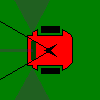

In [6]:
world.take_picture("red")

In [7]:
world.robots["red"]["camera"]

<Camera 'camera' size=(256,128), angle=60.0>

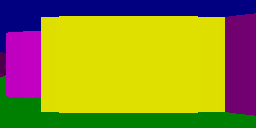

In [8]:
world.robots["red"]["camera"].take_picture()

In [10]:
world.robots[0].move(1, 0)
world.robots[1].move(1, 0)

def control(robot):
    if robot.stalled:
        robot.reverse()
    if random.random() < .1:
        robot.turn(1 - random.random() * 2)

In [11]:
world.save()

In [12]:
world.reset()

Using random seed: 2304288


In [13]:
recorder = world.record()

Using random seed: 2304288


In [14]:
robot = world.robots[0]

In [15]:
robot.watch()

In [16]:
world.run([control, control])


Simulation stopped at: 00:00:04.2; speed 0.97 x real time


In [17]:
world.seconds(20, [control, control], show=True, real_time=True)


Simulation stopped at: 00:00:09.5; speed 0.97 x real time


In [18]:
world.seconds(200, [control, control], show=False)


Simulation stopped at: 00:03:29.5; speed 49.45 x real time


In [ ]:
world.seconds(200, [control, control], show=False, show_progress=False)

Player(children=(VBox(children=(HBox(children=(FloatSlider(value=0.0, continuous_update=False, description='Ti…

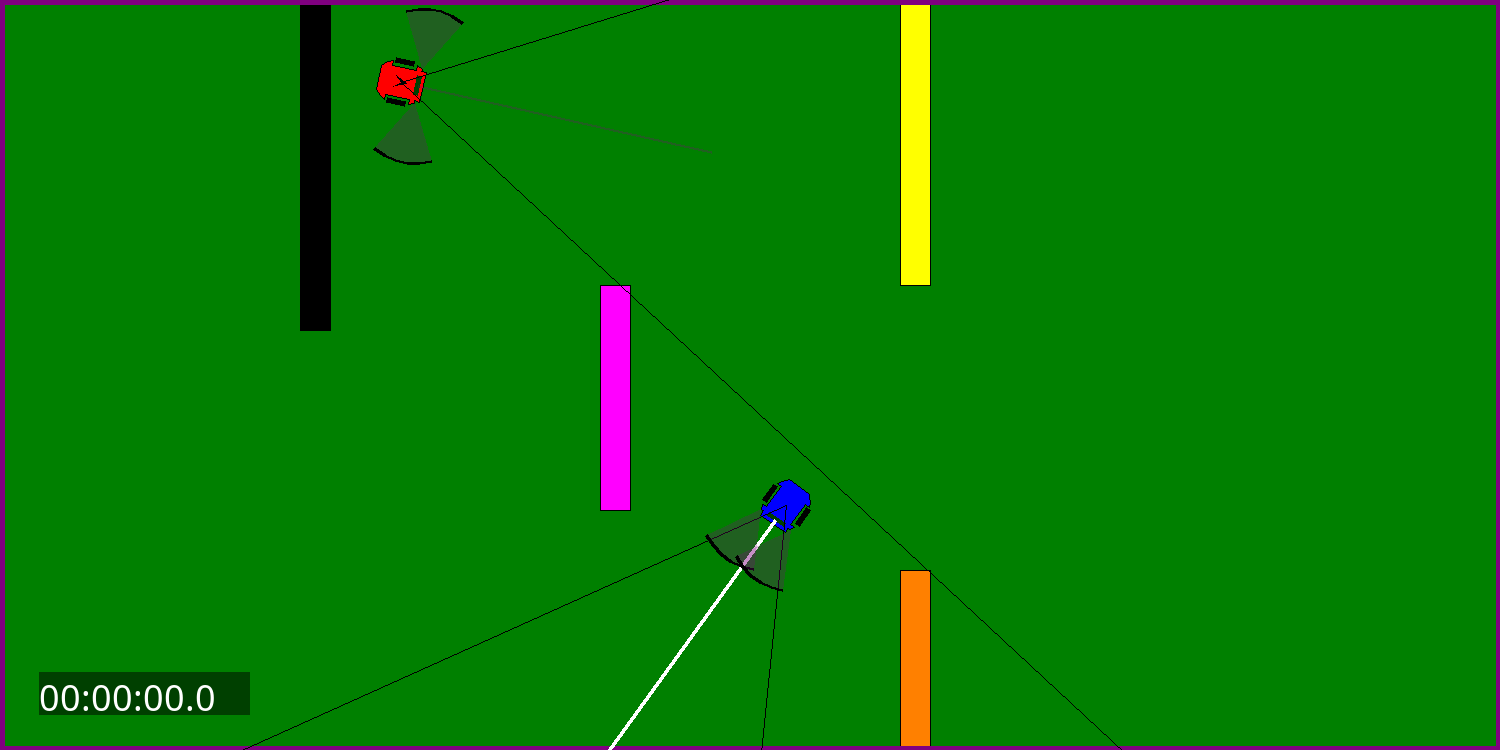

In [19]:
recorder.watch()

In [21]:
recorder.world.robots["red"].watch()

In [22]:
recorder.world.robots["red"]["camera"].watch()

Image(value=b"\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x00\x00\x00\x00\x80\x08\x06\x00\x00\x00\xe4\xb5\…

In [23]:
recorder.save_as(mp4=True, stop=201.0, step=1.0, duration=1000)

202it [00:30,  6.60it/s]


In [24]:
world.reset()

Using random seed: 2304288


# Example 2

In [30]:
import jyrobot
import time

In [31]:
w = jyrobot.World(width=500, height=500, ground_color="white", seed=10)
w.watch()

Using random seed: 10


Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x0…

In [33]:
for i in range(20):
    robot = jyrobot.Scribbler(color="blue", name="Scribby-%s" % i)
    sensor = jyrobot.Camera()
    robot.add_device(sensor)
    w.add_robot(robot)
w.draw()

In [35]:
from jyrobot.utils import Color
import random
for robot in w.robots:
    robot.set_color( Color(
        255 * random.random(), 
        255 * random.random(), 
        255 * random.random(), 
   ))
w.draw()

In [6]:
%%time
pics = []
for robot in w.robots:
    pic = robot["camera"].take_picture()
    pics.append(pic)

CPU times: user 5.32 s, sys: 11.4 ms, total: 5.33 s
Wall time: 5.33 s


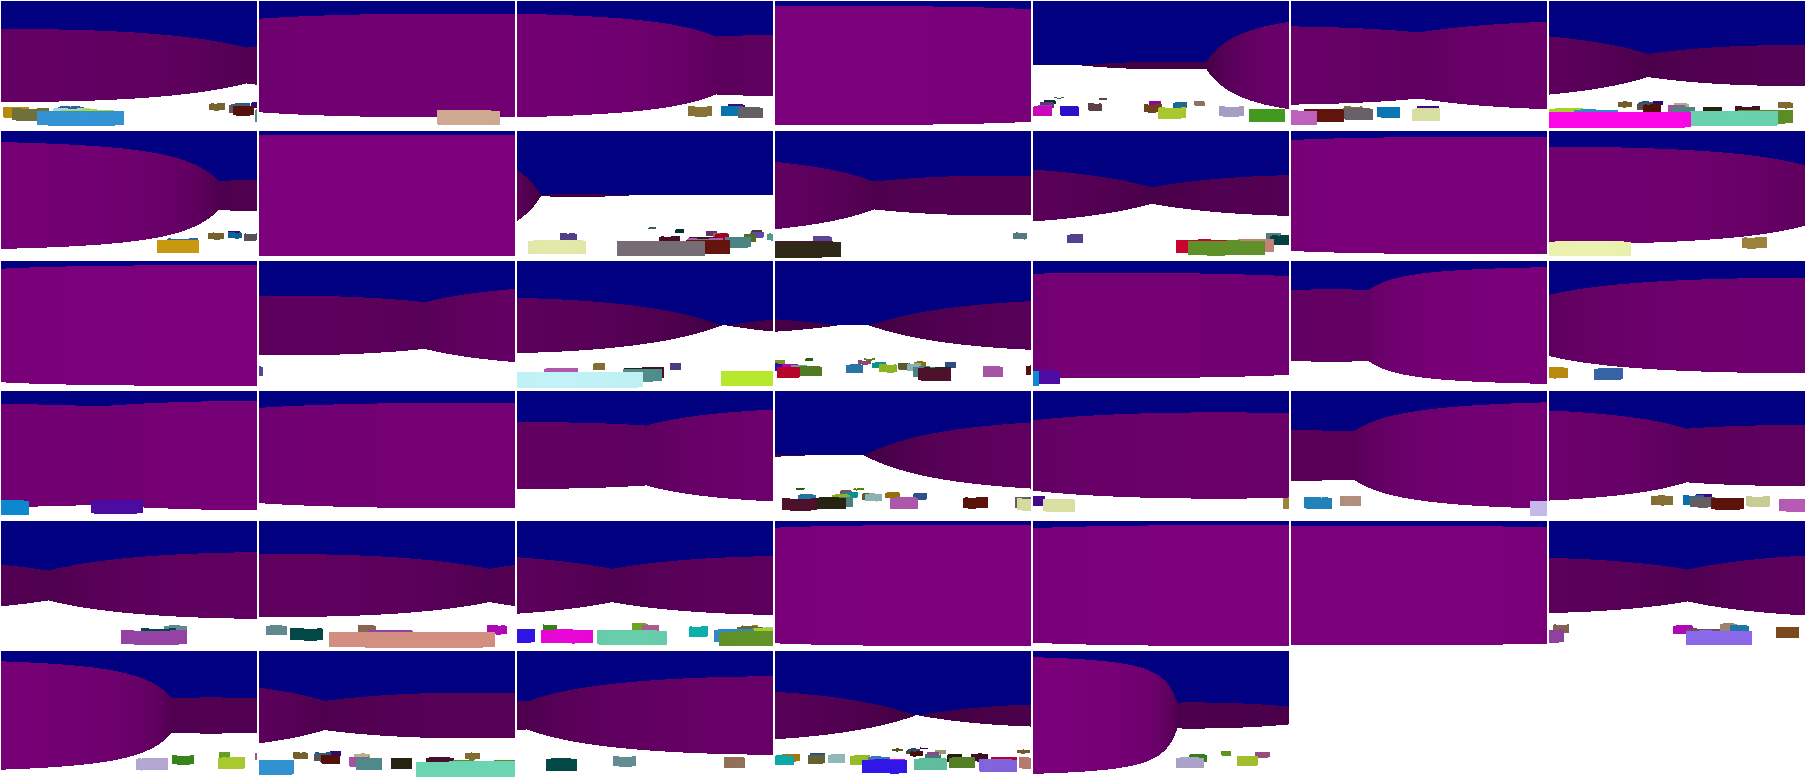

In [7]:
jyrobot.gallery(*pics)

In [8]:
%%time
pics = []
for i, robot in enumerate(w.robots):
    pic = w.take_picture(i, size=200)
    pics.append(pic)

CPU times: user 1.75 ms, sys: 4.03 ms, total: 5.78 ms
Wall time: 4.92 ms


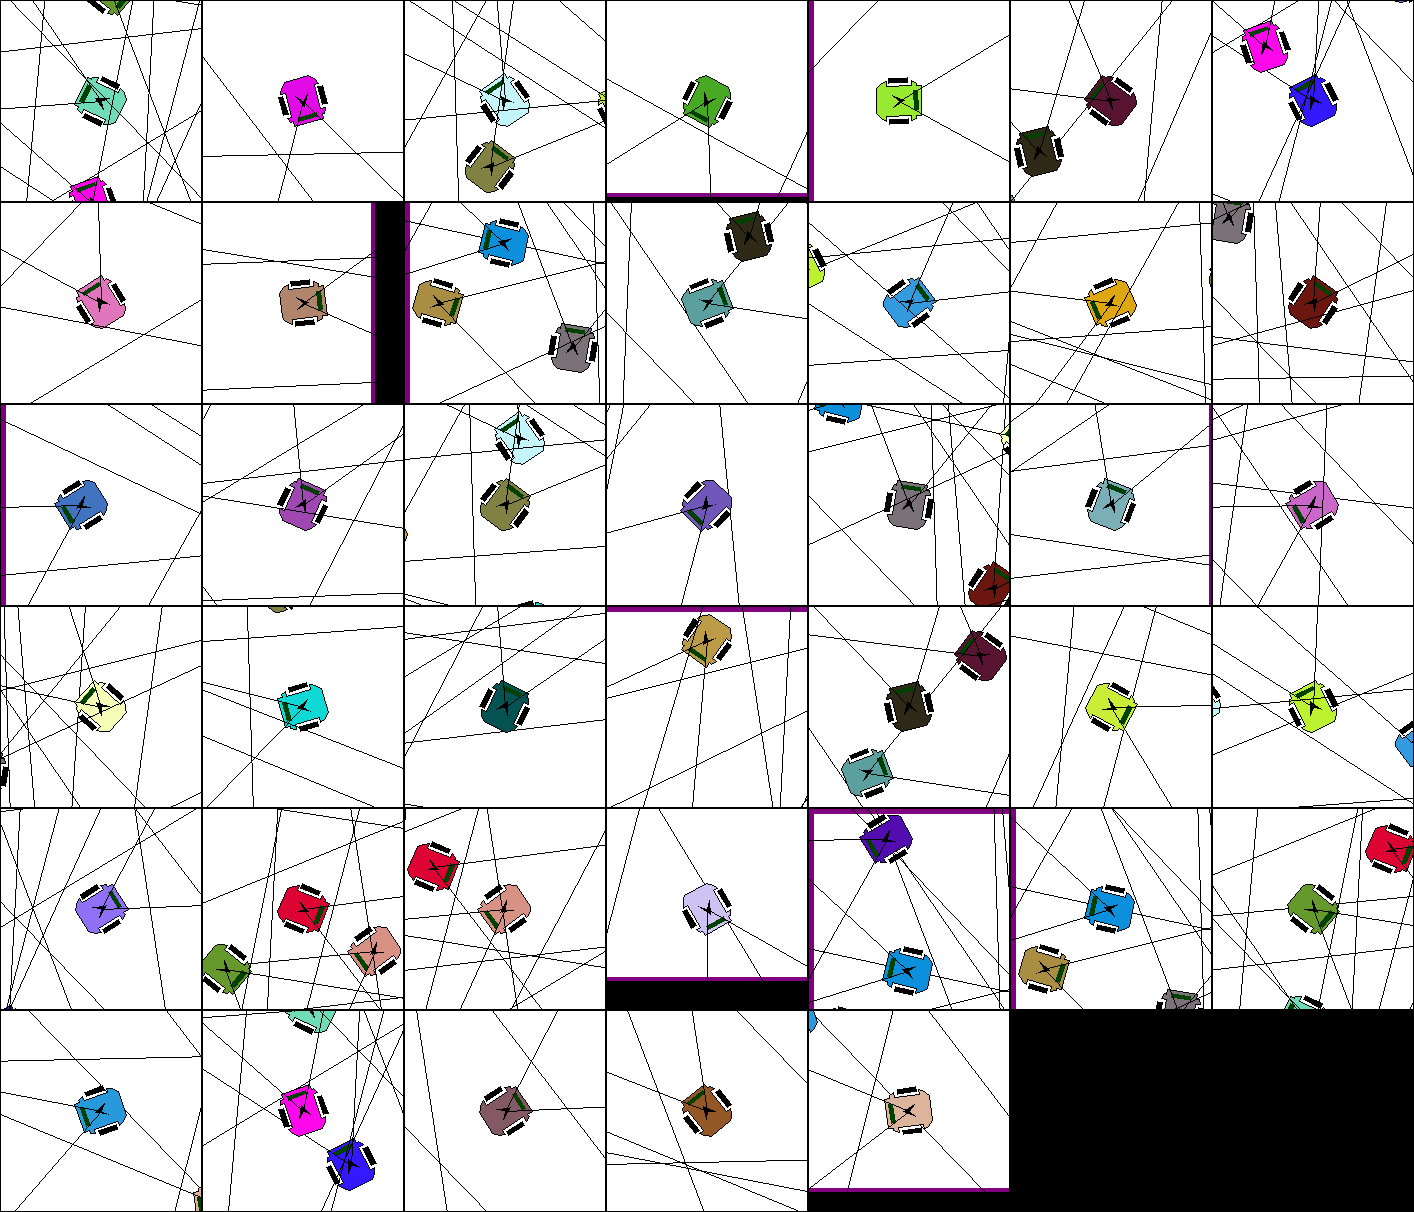

In [9]:
jyrobot.gallery(*pics, background_color="black")

In [10]:
for robot in w.robots:
    robot.move(1,0)

In [11]:
def control(world):
    for robot in world.robots:
        if robot.stalled:
            robot.reverse()
        robot.turn(1 - random.random() * 2)

In [12]:
w.run(control, show=True, real_time=False)


Simulation stopped at: 00:01:29.6; speed 3.79 x real time


# Example 3

In [13]:
import jyrobot as jr
import random

In [14]:
w = jr.World(width=100, height=100, scale=10)

Random seed set to: 5954758


In [15]:
w.watch()

Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x0…

In [16]:
r = jr.Scribbler()

In [17]:
w.add_robot(r)
w.draw()

In [18]:
sensor = jr.RangeSensor()

In [19]:
r.add_device(sensor)
w.update()

In [20]:
r.forward(1)

def control(world):
    for robot in world.robots:
        if robot.stalled:
            robot.reverse()
        robot.turn(1 - random.random() * 2)

In [21]:
r.plot(lambda robot: (robot.x, robot.world.width - robot.y)).watch()

Figure(axes=[Axis(label='x', scale=LinearScale()), Axis(label='y', orientation='vertical', scale=LinearScale()…

In [22]:
w.seconds(.1, control, show=True, real_time=True)

In [23]:
w.seconds(10, control, show=True, real_time=True)


Simulation stopped at: 00:00:10.1; speed 0.96 x real time


In [38]:
w.run(control, show=True, real_time=True)


Simulation stopped at: 00:02:50.9; speed 0.99 x real time


In [24]:
w.seconds(10, control, show=True, real_time=False)


Simulation stopped at: 00:00:20.1; speed 86.55 x real time


In [25]:
w.seconds(10, control, show=False)


Simulation stopped at: 00:00:30.1; speed 227.28 x real time


In [26]:
r.set_pose(50, 50, 180)

In [27]:
r.set_color("purple")

In [28]:
w.draw()

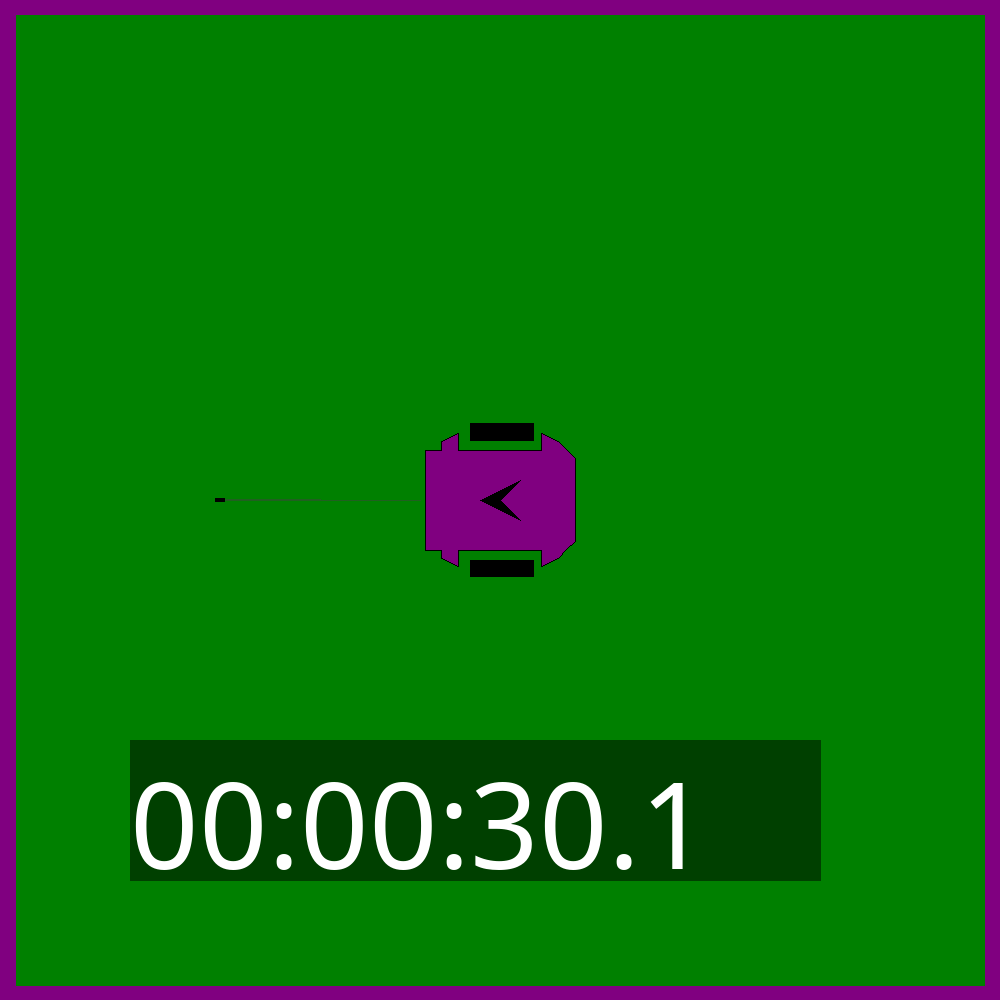

In [29]:
w.take_picture()